#Bitcoin Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv("BTC.csv",
                 parse_dates=["Date"],#sutun date tipinde olsun
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
print("=============================================")
print("Data types of the columns in the data frame:", df.dtypes)
print("=============================================")
print("Shape of the data frame:", df.shape)
print("=============================================")
print("Information about the data frame:", df.info())
df.head()

Data types of the columns in the data frame: Currency                object
Closing Price (USD)    float64
24h Open (USD)         float64
24h High (USD)         float64
24h Low (USD)          float64
dtype: object
Shape of the data frame: (2787, 5)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB
Information about the data frame: None


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
len(df)

2787

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


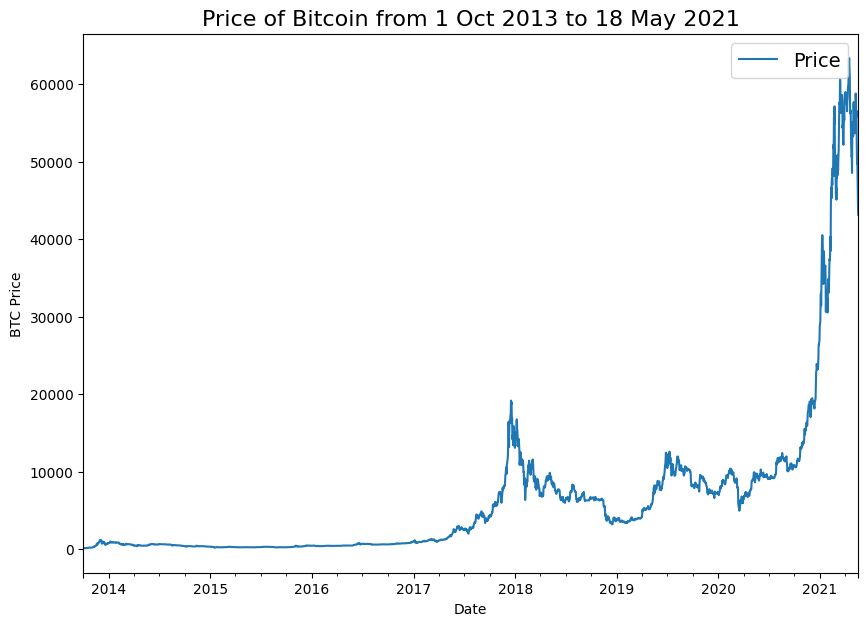

In [ ]:
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

# Create train and test sets for time series(wrong way)

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
#wrong way to make train and test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(timesteps,
                                               prices,
                                               test_size=0.2,
                                               random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

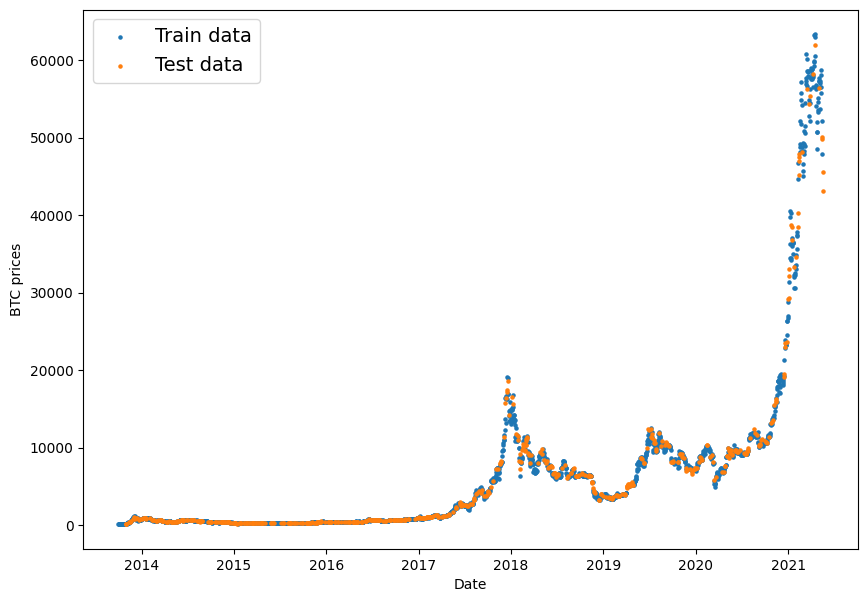

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label='Train data')
plt.scatter(X_test,y_test,s=5,label='Test data')
plt.xlabel("Date")
plt.ylabel('BTC prices')
plt.legend(fontsize=14);

#Correct way

In [ ]:
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

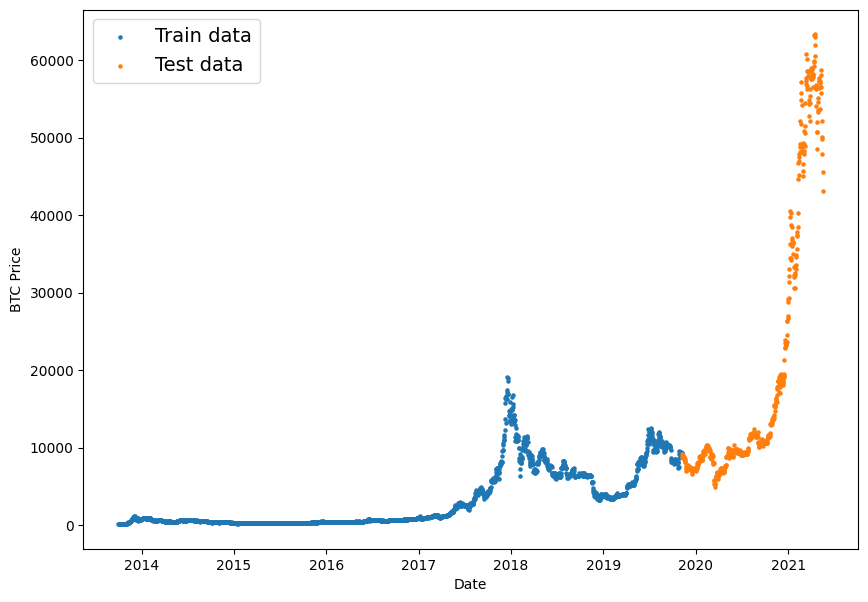

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

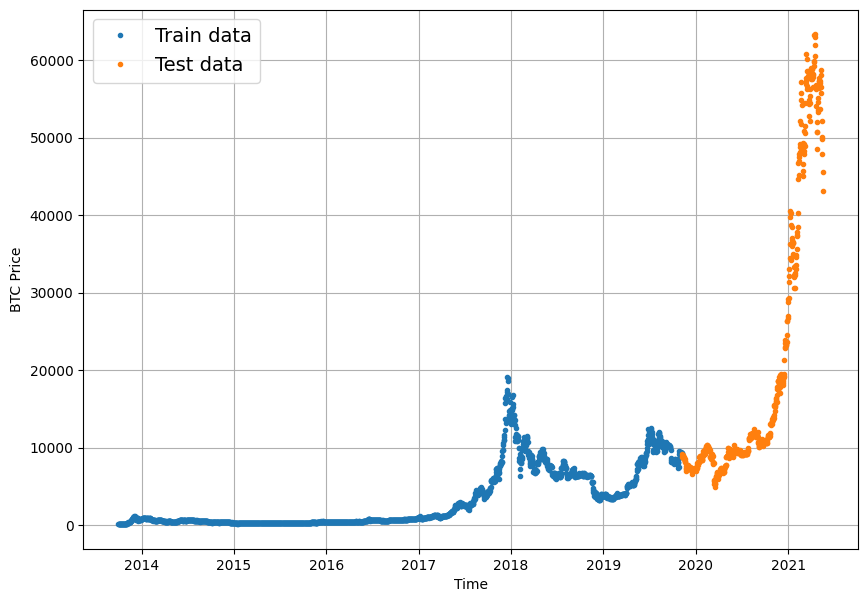

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label=("Train data"))
plot_time_series(timesteps=X_test, values=y_test, label=("Test data"))


#Model 0:Naive forecast(baseline)

In [ ]:
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

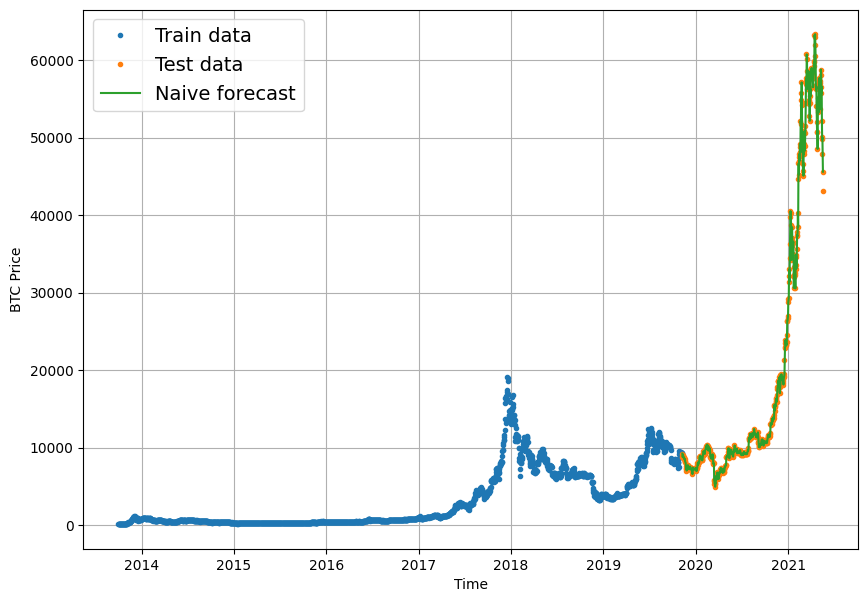

In [ ]:
plt.figure(figsize = (10,7))
offset=300
plot_time_series(timesteps= X_train, values = y_train, label= "Train data")
plot_time_series(timesteps = X_test, values = y_test, label = "Test data")
plot_time_series(timesteps = X_test[1:], values = naive_forecast, format="-", label = "Naive forecast")

In [ ]:
import tensorflow as tf

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):


  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find the MAE of naive forecast (with no seasonality)
  mae_naive_no_seaon = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae/mae_naive_no_seaon

In [ ]:
def evaluate_preds(y_true, y_pred):


  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mse": mse.numpy(),
          "mae" : mae.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase" : mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:], y_pred = naive_forecast)
naive_results

{'mse': 1147547.0,
 'mae': 567.9802,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
tf.reduce_mean(y_test).numpy()

20056.632963737226

#Windowing Dataset(for one week)

[0,1,2,3,4,5,6] -> [7]

[1,2,3,4,5,6,7] -> [8]

[2,3,4,5,6,7,8] -> [9]

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 7 # use 7 timesteps in the past

In [ ]:
# Create a function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Create labels for windowed dataset
  E.g if horizon = 1
  Input: [0, 1,  2, 3, 4, 5, 6, 7] -> Output: ([0, 1,  2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
#The steps our function needs to take include:
# Create a window step of specific window size (i.e. [0, 1, 2, 3, 4, 5, 6])
# Use NumPy indexing to create a 2D array of multiple window steps, for example: [0, 1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7], [ 2, 3, 4, 5, 6, 7, 8]
# Use the 2D array of multiple window steps (from 2) to index on a target series (e.g. historical price of Bitcoin)
# Use our get_labelled_window() function we created to turn the window steps into windows with a specified horizon

def make_windows(x, window_size=7, horizon=1):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T


  windowed_array = x[window_indexes]
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: 123.033
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: 124.049
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: 125.96116


In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]),y_train[WINDOW_SIZE:])

True

# Model 1

In [ ]:
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels))

Epoch 1/100
18/18 [==============================] - 1s 29ms/step - loss: 1294.5060 - mae: 1294.5060 - val_loss: 3236.6633 - val_mae: 3236.6633
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 345.3282 - mae: 345.3282 - val_loss: 1225.3235 - val_mae: 1225.3235
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 217.5025 - mae: 217.5025 - val_loss: 1179.3615 - val_mae: 1179.3615
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 202.5542 - mae: 202.5542 - val_loss: 1091.3047 - val_mae: 1091.3047
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 191.5916 - mae: 191.5916 - val_loss: 1052.5454 - val_mae: 1052.5454
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 182.9774 - mae: 182.9774 - val_loss: 988.2729 - val_mae: 988.2729
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 171.0994 - mae: 171.0994 - val_loss: 941.9517 - val_mae: 941.9517
Epoch 8/100
18

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 670.5175 - mae: 670.5175


[670.5175170898438, 670.5175170898438]

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8678.114, 8599.029, 8860.685, 8621.356, 8572.437, 8565.751,
        8521.173, 8355.929, 8295.033, 8365.77 ], dtype=float32)>)

In [ ]:
def evaluate_preds(y_true, y_pred):
  """
  Evaluates the predictions for different metrics and stores in dictionary
  """

  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mse": mse.numpy(),
          "mae" : mae.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase" : mase.numpy()}

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mse': 1372254.5,
 'mae': 670.5174,
 'rmse': 1171.4326,
 'mape': 3.1019156,
 'mase': 1.1779133}

In [ ]:
naive_results

{'mse': 1147547.0,
 'mae': 567.9802,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

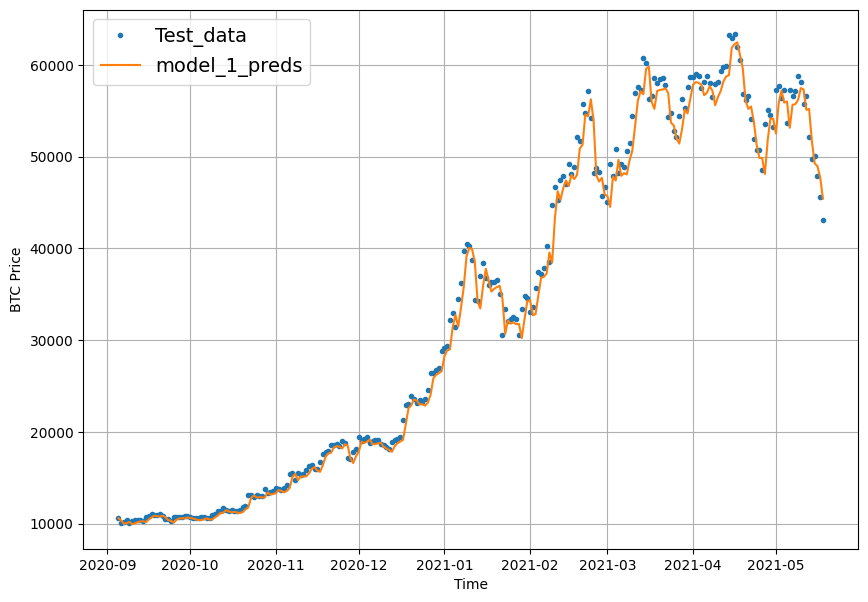

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30

In [ ]:
def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create a function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size label.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of window size
  print(f"Window indexex:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array with 2D array of multiple window sets
  windowed_array = x[window_indexes]

  #4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window indexex:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: 123.033
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: 124.049
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: 125.96116


In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]),y_train[WINDOW_SIZE:])

False

In [ ]:
len(train_labels)

2205

#Model 2

In [ ]:
from tensorflow.keras import layers

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_2.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels))

Epoch 1/100
18/18 [==============================] - 1s 12ms/step - loss: 2161.6667 - mae: 2161.6667 - val_loss: 1133.7354 - val_mae: 1133.7354
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 392.3226 - mae: 392.3226 - val_loss: 1903.7305 - val_mae: 1903.7305
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 235.5616 - mae: 235.5616 - val_loss: 1105.6917 - val_mae: 1105.6917
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 179.1365 - mae: 179.1365 - val_loss: 988.5532 - val_mae: 988.5532
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 169.1151 - mae: 169.1151 - val_loss: 941.3860 - val_mae: 941.3860
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 165.8451 - mae: 165.8451 - val_loss: 919.0485 - val_mae: 919.0485
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 159.5653 - mae: 159.5653 - val_loss: 896.4456 - val_mae: 896.4456
Epoch 8/100
18/18 

In [ ]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 687.6318 - mae: 687.6318


[687.6317749023438, 687.6317749023438]

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_2_preds = make_preds(model_2, test_windows)
len(model_2_preds), model_2_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8676.981, 8594.346, 8832.429, 8604.092, 8562.652, 8544.021,
        8519.484, 8330.717, 8286.15 , 8348.283], dtype=float32)>)

In [ ]:
def evaluate_preds(y_true, y_pred):
  """
  Evaluates the predictions for different metrics and stores in dictionary
  """

  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mse": mse.numpy(),
          "mae" : mae.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase" : mase.numpy()}

In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mse': 1415630.4,
 'mae': 687.6318,
 'rmse': 1189.8026,
 'mape': 3.1948419,
 'mase': 1.2079786}

In [ ]:
model_1_results

{'mse': 1372254.5,
 'mae': 670.5174,
 'rmse': 1171.4326,
 'mape': 3.1019156,
 'mase': 1.1779133}

In [ ]:
naive_results

{'mse': 1147547.0,
 'mae': 567.9802,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_1_preds")

IndexError: ignored

<Figure size 1000x700 with 0 Axes>

In [ ]:
HORIZON = 7 # predict one step at a time
WINDOW_SIZE = 30 # use 7 timesteps in the past

In [ ]:
def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: 1 -> Label: [2 3 4 5 6 7 8]


In [ ]:
def make_windows(x, window_size=30, horizon=7):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T


  windowed_array = x[window_indexes]
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
 192.75666 197.4    ] -> Label: [196.02499 198.04883 198.93233 200.543   210.3075  225.02    248.25333]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033
 124.049   125.96116 125.27966 125.9275  126.38333 135.24199 133.20333
 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333
 188.29716 200.70166 180.355   175.03166 177.6965  187.15983 192.75666
 197.4     196.02499] -> Label: [198.04883 198.93233 200.543   210.3075  225.02    248.25333 262.32666]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049
 125.96116 125.27966 125.9275  126.38333 135.24199 133.20333 142.76333
 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333 188

In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]),y_train[WINDOW_SIZE:])

False

# Model 3

In [ ]:
from tensorflow.keras import layers

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels))

Epoch 1/100
18/18 [==============================] - 1s 18ms/step - loss: 1153.1854 - mae: 1153.1854 - val_loss: 2553.6907 - val_mae: 2553.6907
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 479.4623 - mae: 479.4623 - val_loss: 2263.9541 - val_mae: 2263.9541
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 380.2862 - mae: 380.2862 - val_loss: 1866.7994 - val_mae: 1866.7994
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 341.0619 - mae: 341.0619 - val_loss: 1686.3654 - val_mae: 1686.3654
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 322.1746 - mae: 322.1746 - val_loss: 1724.7080 - val_mae: 1724.7080
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 310.5084 - mae: 310.5084 - val_loss: 1717.2007 - val_mae: 1717.2007
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 298.5613 - mae: 298.5613 - val_loss: 1605.7162 - val_mae: 1605.7162
Epoch 8/10

In [ ]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1331.4006 - mae: 1331.4006


[1331.400634765625, 1331.400634765625]

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_3_preds = make_preds(model_3, test_windows)
len(model_3_preds), model_3_preds[:10]

18/18 [==============================] - 0s 2ms/step


(551,
 <tf.Tensor: shape=(10, 7), dtype=float32, numpy=
 array([[9207.645 , 9250.62  , 9136.233 , 9251.49  , 8964.592 , 8780.845 ,
         9350.382 ],
        [8681.68  , 8831.086 , 8832.243 , 9061.234 , 8815.209 , 8560.818 ,
         9034.606 ],
        [8478.791 , 8596.073 , 8666.032 , 8775.805 , 8954.516 , 8578.409 ,
         8780.104 ],
        [8761.726 , 8890.423 , 8881.628 , 8620.505 , 9079.997 , 8929.57  ,
         8667.3125],
        [8824.486 , 8786.312 , 8934.407 , 8564.681 , 8664.758 , 8857.613 ,
         8563.182 ],
        [8815.4375, 8826.328 , 8912.879 , 8660.862 , 8504.065 , 8515.584 ,
         8713.498 ],
        [8674.576 , 8826.453 , 8749.915 , 8704.1045, 8391.298 , 8078.975 ,
         8592.501 ],
        [8581.825 , 8644.274 , 8463.669 , 8490.626 , 8247.596 , 7984.789 ,
         8539.423 ],
        [8473.853 , 8451.582 , 8375.5205, 8226.517 , 8412.138 , 7971.583 ,
         8370.76  ],
        [8308.779 , 8480.902 , 8420.327 , 8273.881 , 8385.442 , 8031.968 ,
     

In [ ]:
def evaluate_preds(y_true, y_pred):
  """
  Evaluates the predictions for different metrics and stores in dictionary
  """

  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mse": mse.numpy(),
          "mae" : mae.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase" : mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mse': array([1.70501234e+05, 6.85061406e+04, 8.24435156e+04, 8.60725234e+04,
        5.07115117e+04, 9.86830547e+04, 7.38538516e+04, 1.43898266e+05,
        2.17069594e+05, 2.97674531e+05, 5.18091688e+05, 3.55886969e+05,
        5.83811688e+05, 5.56947625e+05, 1.96628109e+05, 1.03713789e+05,
        1.45691375e+05, 2.79963594e+05, 2.34432531e+05, 2.54944094e+05,
        5.20668711e+04, 5.72971758e+04, 3.07735273e+04, 2.67663496e+04,
        3.60503867e+04, 5.74411875e+04, 1.04592539e+05, 1.53464609e+05,
        5.83795312e+04, 2.39417656e+04, 2.85858340e+04, 2.36442676e+04,
        2.52169238e+04, 5.88509609e+04, 5.14715234e+04, 8.16110000e+04,
        6.47436914e+04, 8.48975156e+04, 1.06606984e+05, 2.06201156e+05,
        5.79830938e+05, 9.57790625e+04, 7.21161797e+04, 4.71377188e+04,
        2.60204746e+04, 4.51062930e+04, 5.00383672e+04, 5.80568047e+04,
        2.27801289e+04, 7.17158281e+04, 3.44872500e+04, 4.08601914e+04,
        1.99734590e+04, 9.21857344e+04, 2.31322281e+05, 4

In [ ]:
model_2_results

{'mse': 1247725.6,
 'mae': 599.282,
 'rmse': 1117.0164,
 'mape': 2.7258098,
 'mase': 1.0475507}

In [ ]:
model_1_results

{'mse': 1372254.5,
 'mae': 670.5174,
 'rmse': 1171.4326,
 'mape': 3.1019156,
 'mase': 1.1779133}

In [ ]:
naive_results

{'mse': 1147547.0,
 'mae': 567.9802,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

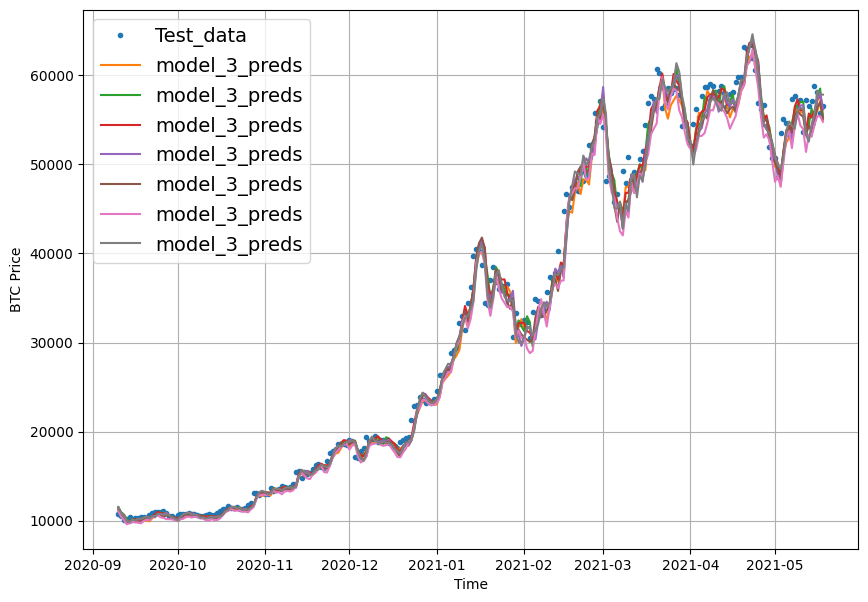

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, format="-", label="model_3_preds")

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [ ]:
# Let's reshape our data to pass it into a Conv1D layer
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for 'input_dims'

In [ ]:
# Test our lambda layer
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


# Model 4: Conv1D

In [ ]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=7, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels))

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6529 (25.50 KB)
Trainable params: 6529 (25.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 609.0818


609.0818481445312

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
len(model_4_preds), model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8790.62 , 8702.707, 8920.112, 8698.876, 8651.187, 8645.014,
        8590.351, 8457.007, 8368.378, 8437.126], dtype=float32)>)

In [ ]:
def evaluate_preds(y_true, y_pred):
  """
  Evaluates the predictions for different metrics and stores in dictionary
  """

  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mse": mse.numpy(),
          "mae" : mae.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase" : mase.numpy()}

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mse': 1253912.6,
 'mae': 609.0819,
 'rmse': 1119.7823,
 'mape': 2.7414281,
 'mase': 1.0699883}

In [ ]:
model_1_results

{'mse': 1372254.5,
 'mae': 670.5174,
 'rmse': 1171.4326,
 'mape': 3.1019156,
 'mase': 1.1779133}

In [ ]:
model_2_results

{'mse': 1247725.6,
 'mae': 599.282,
 'rmse': 1117.0164,
 'mape': 2.7258098,
 'mase': 1.0475507}

In [ ]:
naive_results

{'mse': 1147547.0,
 'mae': 567.9802,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]),y_train[WINDOW_SIZE:])

True

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

#Model 5:LSTM

In [ ]:
tf.random.set_seed(42)

# Create model
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels))


In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 595.3295


595.3295288085938

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
len(model_4_preds), model_5_preds[:10]

18/18 [==============================] - 0s 4ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8992.195, 8829.656, 9007.007, 8862.479, 8765.531, 8790.572,
        8732.538, 8586.375, 8509.248, 8547.706], dtype=float32)>)

In [ ]:
def evaluate_preds(y_true, y_pred):
  """
  Evaluates the predictions for different metrics and stores in dictionary
  """

  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mse": mse.numpy(),
          "mae" : mae.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase" : mase.numpy()}

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mse': 1271790.0,
 'mae': 595.3296,
 'rmse': 1127.7367,
 'mape': 2.682316,
 'mase': 1.0458292}

#  Building an Ensemble Model for Forecasting

In [ ]:
# Make features and labels
X = bitcoin_prices.dropna().drop("Price", axis=1)
y = bitcoin_prices.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 0), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 0), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):


  ensemble_models = []


  for i in range(num_iter):
   # Build a new model with a new loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")


      model = tf.keras.Sequential([
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,

                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])


      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0
Optimizing model by reducing: mape for 1000 epochs, model number: 0
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1
Optimizing model by reducing: mape for 1000 epochs, model number: 1
Optimizing model by reducing: mae for 1000 epochs, model number: 2
Optimizing model by reducing: mse for 1000 epochs, model number: 2
Optimizing model by reducing: mape for 1000 epochs, model number: 2
Optimizing model by reducing: mae for 1000 epochs, model number: 3
Optimizing model by reducing: mse for 1000 epochs, model number: 3
Optimizing model by reducing: mape for 1000 epochs, model number: 3
Optimizing model by reducing: mae for 1000 epochs, model number: 4
Optimizing model by reducing: mse for 1000 epochs, model number: 4
Optimizing model by reducing: mape for 1000 epochs, model 

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 227ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 88ms/step


<tf.Tensor: shape=(15, 558), dtype=float32, numpy=
array([[2.999962 , 2.999962 , 2.999962 , ..., 2.999962 , 2.999962 ,
        2.999962 ],
       [2.3897822, 2.3897822, 2.3897822, ..., 2.3897822, 2.3897822,
        2.3897822],
       [2.0696452, 2.0696452, 2.0696452, ..., 2.0696452, 2.0696452,
        2.0696452],
       ...,
       [2.999962 , 2.999962 , 2.999962 , ..., 2.999962 , 2.999962 ,
        2.999962 ],
       [2.3897822, 2.3897822, 2.3897822, ..., 2.3897822, 2.3897822,
        2.3897822],
       [2.0696452, 2.0696452, 2.0696452, ..., 2.0696452, 2.0696452,
        2.0696452]], dtype=float32)>

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mse': 708707400.0,
 'mae': 20054.244,
 'rmse': 26621.559,
 'mape': 99.979935,
 'mase': 35.308}

# Multivariate time series forecasting model

In [ ]:
# Let's add halving events to our dataset
block_reward_1 = 50 # 3 Jan 2009 - this block reward isn't in our dataset
block_reward_2 = 25 # 28 Nov 2012 - also not in our dataset
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
# Create date ranges to assign block_reward values
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] =None

In [ ]:
# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()


,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


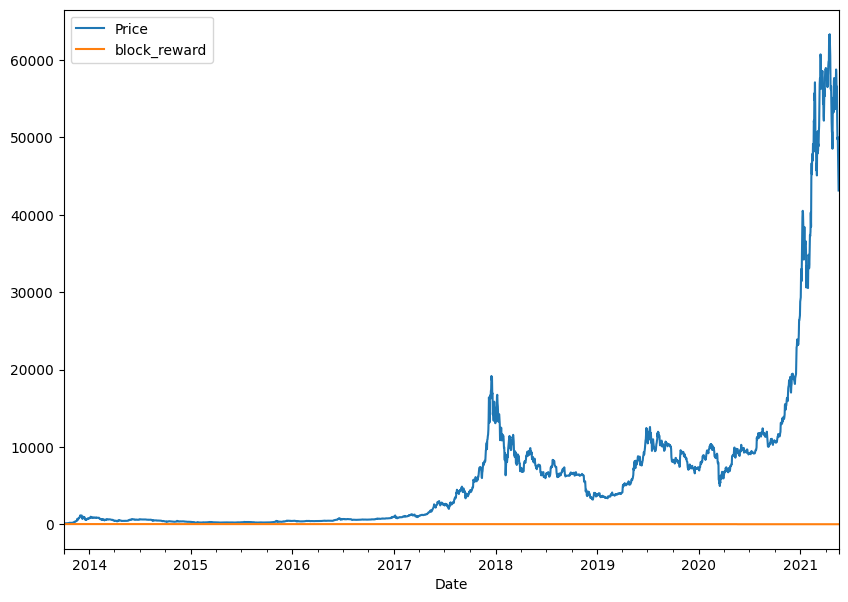

In [ ]:
bitcoin_prices_block.plot(figsize=(10,7));

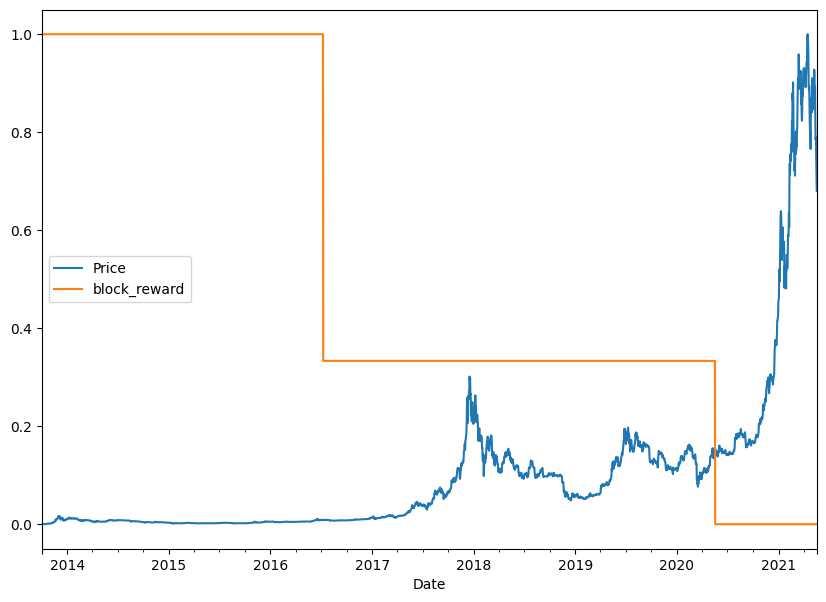

In [ ]:
# Plot the block reward vs. price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7));

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift value for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [ ]:
# Split into train and test sets using indexing
split_size = int(len(X) * 0.8)
train_windows, train_labels = X[:split_size], y[:split_size]
test_windows, test_labels = X[split_size:], y[split_size:]
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

# Model 6

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# Build model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_6.fit(train_windows, train_labels,
            epochs=100,
            verbose=1,
            validation_data=(test_windows,test_labels))

Epoch 1/100
70/70 [==============================] - 1s 3ms/step - loss: 985.2899 - val_loss: 918.2793
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 160.5582 - val_loss: 847.9326
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 150.9092 - val_loss: 793.6904
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 147.4123 - val_loss: 754.4045
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 146.7273 - val_loss: 818.8834
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 129.6460 - val_loss: 744.7961
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 129.5655 - val_loss: 654.1570
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 131.0926 - val_loss: 667.6156
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 122.3779 - val_loss: 851.6185
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss:

In [ ]:
# Evalutate multivariate model
model_6.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 689.6482


689.648193359375

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_6_preds = make_preds(model_6, test_windows)
len(model_6_preds), model_6_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8636.667, 8597.123, 8865.795, 8580.204, 8554.367, 8554.827,
        8492.221, 8340.888, 8274.516, 8357.69 ], dtype=float32)>)

In [ ]:
def evaluate_preds(y_true, y_pred):
  """
  Evaluates the predictions for different metrics and stores in dictionary
  """

  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mse": mse.numpy(),
          "mae" : mae.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase" : mase.numpy()}

In [ ]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_6_preds)
model_6_results

{'mse': 1437587.6,
 'mae': 689.64825,
 'rmse': 1198.9944,
 'mape': 3.204368,
 'mase': 1.2115209}

# Outliear Detection& Feature Importanceл

In [ ]:
# Let's add halving events to our dataset
block_reward_1 = 50 # 3 Jan 2009 - this block reward isn't in our dataset
block_reward_2 = 25 # 28 Nov 2012 - also not in our dataset
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] =None

In [ ]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


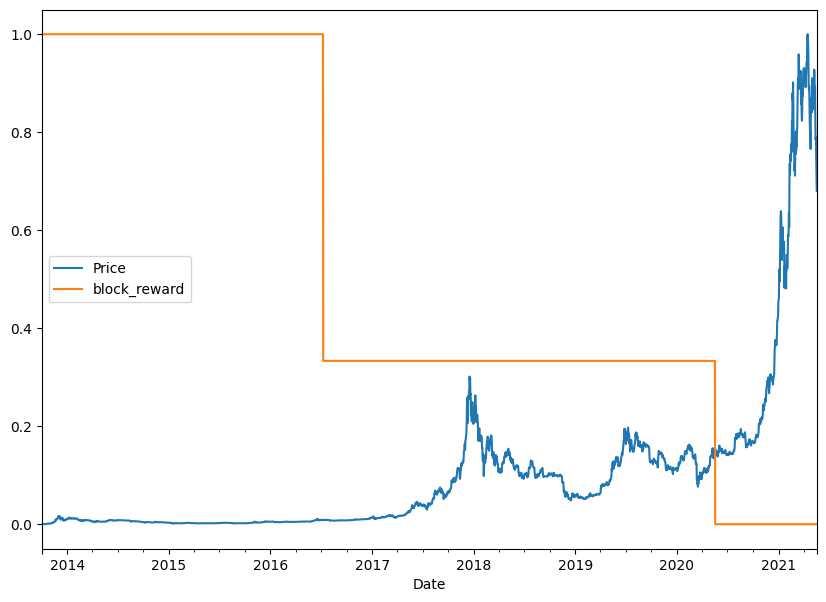

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7));

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift value for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
from collections import Counter
def detect_outliers(df, features):
  outlier_indices = []

  for f in features:
    Q1 = np.percentile(df[f], 25)
    Q3 = np.percentile(df[f], 75)
    IQR = Q3 - Q1

    outlier_step = IQR * 1.5
    outlier_list_column = df[(df[f] < Q1 - outlier_step) | (df[f] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_column)

  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

  return multiple_outliers

In [ ]:
bitcoin_prices_windowed.loc[detect_outliers(bitcoin_prices_windowed, ["block_reward",'Price',"Price+1","Price+2","Price+3","Price+4"])]

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,


#  RandomForest feature_importances

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(train_windows, train_labels)

print(f"model score on training data: {model.score(train_windows, train_labels)}")
print(f"model score on testing data: {model.score(test_windows, test_labels)}")

model score on training data: 0.9991602343897203
model score on testing data: 0.15476574618835293


In [ ]:
importances = model.feature_importances_

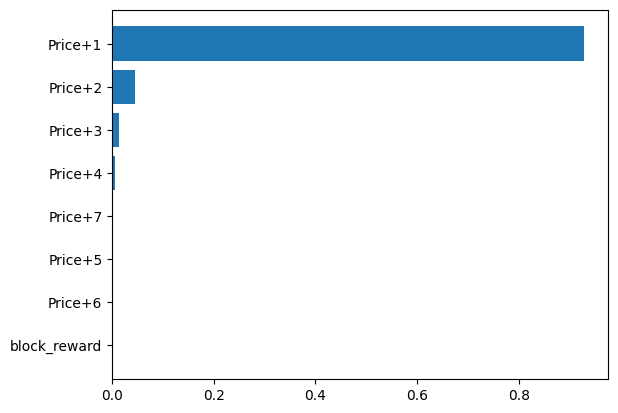

In [ ]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(train_windows.columns)[indices])

In [ ]:
def get_score_after_permutation(model, X, y, curr_feat):
    """return the score of model when curr_feat is permuted"""

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values
    )

    permuted_score = model.score(X_permuted, y)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """compare the score when curr_feat is permuted"""

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance


curr_feat = "Price+1"

feature_importance = get_feature_importance(model, train_windows, train_labels, curr_feat)
print(
    f'feature importance of "{curr_feat}" on train set is '
    f"{feature_importance:.3}"
)

feature importance of "Price+1" on train set is 1.68


In [ ]:
X = bitcoin_prices_windowed.dropna().drop(["Price","Price+2","Price+3","Price+4","Price+5","Price+6","Price+7"], axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [ ]:
X.head()

,block_reward,Price+1
Date,,
2013-10-08,25.0,121.794998
2013-10-09,25.0,123.032997
2013-10-10,25.0,124.049004
2013-10-11,25.0,125.961159
2013-10-12,25.0,125.279663


In [ ]:
# Split into train and test sets using indexing
split_size = int(len(X) * 0.8)
train_windows, train_labels = X[:split_size], y[:split_size]
test_windows, test_labels = X[split_size:], y[split_size:]
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# Build model
model_7 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_7_dense_multivariate")

# Compile model
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_7.fit(train_windows, train_labels,
            epochs=100,
            verbose=1,
            validation_data=(test_windows,test_labels))


Epoch 1/100
70/70 [==============================] - 1s 3ms/step - loss: 1694.1571 - val_loss: 744.6652
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 123.5041 - val_loss: 566.7370
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 106.8635 - val_loss: 566.7782
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 106.4662 - val_loss: 572.0828
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 107.7567 - val_loss: 619.1994
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 108.4077 - val_loss: 567.7288
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 107.2982 - val_loss: 608.4847
Epoch 8/100
70/70 [==============================] - 0s 3ms/step - loss: 110.1738 - val_loss: 618.9751
Epoch 9/100
70/70 [==============================] - 0s 3ms/step - loss: 107.2184 - val_loss: 576.8920
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss

In [ ]:
model_7.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 566.6627


566.6626586914062

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_7_preds = make_preds(model_7, test_windows)
len(model_7_preds), model_7_preds[:10]

18/18 [==============================] - 0s 957us/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8820.926, 8824.62 , 9108.6  , 8737.857, 8787.361, 8775.956,
        8683.133, 8526.345, 8494.869, 8563.149], dtype=float32)>)

In [ ]:
def evaluate_preds(y_true, y_pred):
  """
  Evaluates the predictions for different metrics and stores in dictionary
  """

  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)


  return {"mse": mse.numpy(),
          "mae" : mae.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy()}

In [ ]:
model_7_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_7_preds)
model_7_results

{'mse': 1149347.2, 'mae': 566.66266, 'rmse': 1072.0762, 'mape': 2.5140996}

#Model 8:Turkey Modelл

In [ ]:
bitcoin_prices_block_turkey = bitcoin_prices_block.copy()
bitcoin_prices_block_turkey[1] = bitcoin_prices_block[1] / 100

KeyError: ignored